In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# Data
data = {
    'Number UEs str': ['16', '32', '64', '128', '256', '512', '1024'],
    'E2Nodes ON': [1, 1, 1, 2, 5, 9, 17],
    'E2Nodes OFF':[16, 16, 16, 15, 12, 8, 0],
    'Energy Consumed (W)' : [15.4757, 15.4757, 15.4757, 30.9521, 77.3785, 139.2813, 263.0869],
    'Energy Consumed per UE (W)': [0.96723125, 0.483615625, 0.2418078125, 0.24181328125, 0.302259765625, 0.2720337890625, 0.25692080078125]
}

df = pd.DataFrame(data)
df['Number UEs number'] = df['Number UEs str'].astype(int)

# Set seaborn style
sns.set(style="darkgrid")

The fit curve process involves using a mathematical model to approximate the relationship between two variables—in this case, the number of User Equipment (UEs) and the energy consumed. We define a power-law function, \( y = a \cdot x^b \), as the model to describe this relationship. Using the `curve_fit` function from `scipy.optimize`, we estimate the parameters \( a \) and \( b \) that best fit our data. This involves minimizing the difference between the observed data points and the values predicted by the model. Once the parameters are determined, we generate fitted values using the model and plot these alongside the original data to visualize how well the model describes the observed trends. This process is applied separately for both total energy consumption and energy consumption per UE.

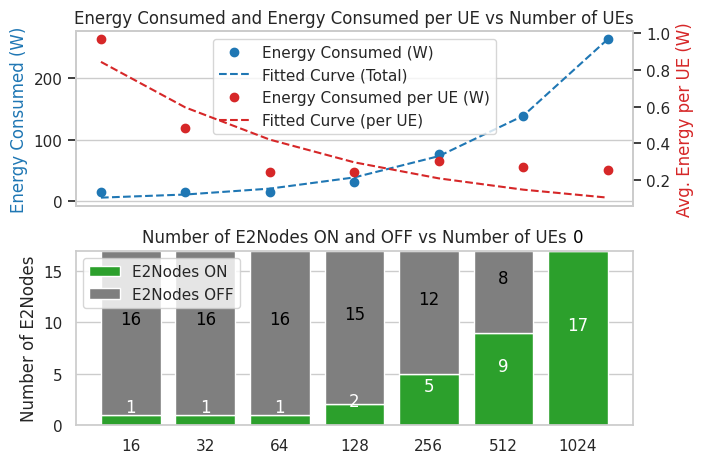

In [6]:
# Define the power-law function for fitting
def power_law(x, a, b):
    return a * np.power(x, b)

# Fit the model to the data for total energy consumption
popt_total, _ = curve_fit(power_law, df['Number UEs number'], df['Energy Consumed (W)'])
a_total, b_total = popt_total
fitted_values_total = power_law(df['Number UEs number'], a_total, b_total)

# Fit the model to the data for per-UE energy consumption
popt_per_ue, _ = curve_fit(power_law, df['Number UEs number'], df['Energy Consumed per UE (W)'])
a_per_ue, b_per_ue = popt_per_ue
fitted_values_per_ue = power_law(df['Number UEs number'], a_per_ue, b_per_ue)

# Set seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(7.2, 4.8), sharex=False)

# Line plot for Energy Consumed and Energy Consumed per UE
ax2 = axs[0].twinx()

axs[0].plot(df['Number UEs number'], df['Energy Consumed (W)'], marker='o', linestyle='None', label='Energy Consumed (W)', color='tab:blue')
axs[0].plot(df['Number UEs number'], fitted_values_total, label='Fitted Curve (Total)', color='tab:blue', linestyle='--')
ax2.plot(df['Number UEs number'], df['Energy Consumed per UE (W)'], marker='o', linestyle='None', label='Energy Consumed per UE (W)', color='tab:red')
ax2.plot(df['Number UEs number'], fitted_values_per_ue, label='Fitted Curve (per UE)', color='tab:red', linestyle='--')

# Remove darkgrid style from ax2
ax2.set_facecolor('white')
ax2.grid(False)
ax2.set_xscale('log')

axs[0].set_title('Energy Consumed and Energy Consumed per UE vs Number of UEs')
axs[0].set_ylabel('Energy Consumed (W)')
ax2.set_ylabel('Avg. Energy per UE (W)')
axs[0].yaxis.label.set_color('tab:blue')
ax2.yaxis.label.set_color('tab:red')

# Remove x ticks
ax2.set_xticks([])
# Combine legends from both axes
lines_1, labels_1 = axs[0].get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
axs[0].legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center')

# Stacked bar plot for E2nodes ON and OFF vs Number UEs
bars1 = axs[1].bar(df['Number UEs str'], df['E2Nodes ON'], label='E2Nodes ON', color='tab:green')
bars2 = axs[1].bar(df['Number UEs str'], df['E2Nodes OFF'], bottom=df['E2Nodes ON'], label='E2Nodes OFF', color='tab:grey')

# Add annotations for E2Nodes ON
for bar in bars1:
    height = bar.get_height()
    axs[1].annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height / 2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color='white')

# Add annotations for E2Nodes OFF
for bar in bars2:
    height = bar.get_height()
    axs[1].annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color='black')

axs[1].set_title('Number of E2Nodes ON and OFF vs Number of UEs')
axs[1].set_ylabel('Number of E2Nodes')
axs[1].legend(loc='upper left')

# Adjust layout
plt.tight_layout()
plt.savefig('out/energy-analysis.png', bbox_inches='tight')
plt.savefig('out/energy-analysis.pdf', dpi=300, bbox_inches='tight')

plt.show()